In [43]:
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [65]:
image = imageio.imread("./images/briefs_gray.bmp")
# image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

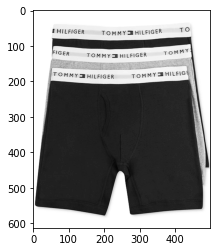

In [66]:
plt.imshow(image, cmap="gray")

In [67]:
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create(64, False)  # size of descr in bytes (default 32); whether to use orientation (default False (I think))

In [68]:
keypoints = fast.detect(image, None)
keypoints, descriptors = brief.compute(image, keypoints)

In [69]:
print(len(keypoints), "     ", descriptors.shape)

2333       (2333, 64)


In [70]:
descriptors[0]

array([ 25,   7,  40, 238,  45,  43, 161, 221,  18,  82,  90,  40, 122,
       141, 134, 140, 230, 248, 122, 129, 216, 152, 219,  32, 248, 220,
       101, 123, 248,  95, 204, 111, 146,  57, 177, 122, 246, 139,  36,
       141, 184,   2, 184, 251,  13, 150,  94,  73,  21,   7, 162,  14,
         1, 190, 145,  94,   2, 139, 187,  23, 236,  85, 239, 129],
      dtype=uint8)

In [71]:
descriptors[0][0]

25

In [76]:
descriptors[0][0].tobytes()  # nope

b'\x19'

In [77]:
np.binary_repr(descriptors[0][0])  # nope

'11001'

In [78]:
np.unpackbits(descriptors[0][0])  # yep!!

array([0, 0, 0, 1, 1, 0, 0, 1], dtype=uint8)

In [80]:
descriptors_binary = np.unpackbits(descriptors, axis=1)

In [81]:
descriptors_binary.shape

(2333, 512)